In [ ]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

     |████████████████████████████████| 109 kB 7.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from numpy import array
import sklearn
import math
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.callbacks import EarlyStopping
pd.options.display.max_rows = 10
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
api_key = 'f9fc59a4f3c4bba1e11aef6e68463df0a807808c'
stock_symbol = 'KO'

In [ ]:
df = pdr.get_data_tiingo(stock_symbol, start='2011-12-31', end='2022-04-02', api_key=api_key)
df.to_csv('{}_data.csv'.format(stock_symbol))
# Reading and converting Date
data = pd.read_csv('{}_data.csv'.format(stock_symbol))
data

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,KO,2012-01-03 00:00:00+00:00,70.14,70.7100,70.100,70.15,7819800,25.446561,25.653355,25.432049,25.450189,15639600,0.0,1.0
1,KO,2012-01-04 00:00:00+00:00,69.70,70.0700,69.500,69.91,7119600,25.286931,25.421165,25.214371,25.363118,14239200,0.0,1.0
2,KO,2012-01-05 00:00:00+00:00,69.37,69.8676,69.350,69.76,7143800,25.167208,25.347735,25.159952,25.308698,14287600,0.0,1.0
3,KO,2012-01-06 00:00:00+00:00,68.93,69.6250,68.620,69.47,6823300,25.007577,25.259721,24.895110,25.203487,13646600,0.0,1.0
4,KO,2012-01-09 00:00:00+00:00,68.93,69.1700,68.800,69.00,5261300,25.007577,25.094648,24.960414,25.032973,10522600,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,KO,2022-03-28 00:00:00+00:00,61.92,61.9400,61.210,61.53,11485219,61.920000,61.940000,61.210000,61.530000,11485219,0.0,1.0
2576,KO,2022-03-29 00:00:00+00:00,62.16,62.5300,61.740,62.21,14720572,62.160000,62.530000,61.740000,62.210000,14720572,0.0,1.0
2577,KO,2022-03-30 00:00:00+00:00,62.21,62.2100,61.555,62.01,13641002,62.210000,62.210000,61.555000,62.010000,13641002,0.0,1.0
2578,KO,2022-03-31 00:00:00+00:00,62.00,62.6400,62.000,62.22,16822902,62.000000,62.640000,62.000000,62.220000,16822902,0.0,1.0


In [ ]:
df_full = data.reset_index()['adjClose']
df1 = df_full[:len(df_full)-30]
df1

0       25.446561
1       25.286931
2       25.167208
3       25.007577
4       25.007577
          ...    
2545    59.840227
2546    60.227318
2547    60.455602
2548    60.445677
2549    61.656575
Name: adjClose, Length: 2550, dtype: float64

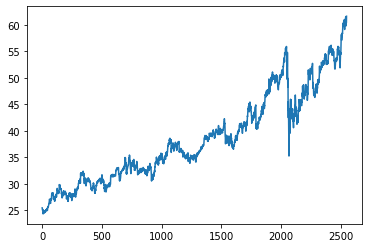

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1657, 893)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape

((1556, 100), (1556,))

In [ ]:
X_test.shape, ytest.shape

((792, 100), (792,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, ytest.shape

((1556, 100, 1), (1556,), (792, 100, 1), (792,))

In [ ]:
model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2)) # Dropout regularisation

model.add(LSTM(150,return_sequences=True))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 150)          91200     
                                                                 
 dropout (Dropout)           (None, 100, 150)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 150)          180600    
                                                                 
 lstm_2 (LSTM)               (None, 100, 150)          180600    
                                                                 
 dropout_1 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

In [ ]:
# use early stop to avoid over-fiting 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

In [ ]:
model = tf.keras.models.load_model('{}_prediction'.format(stock_symbol))

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

33.74746923015977

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

48.63725239976341

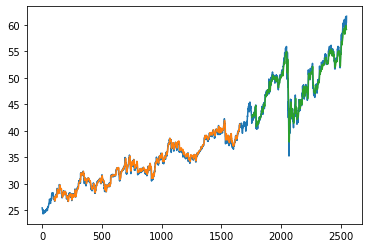

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

893

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

# lst_output

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

2550

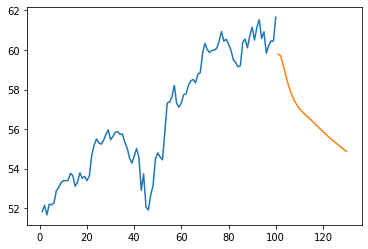

In [ ]:
num_true = len(df1) - 100
plt.plot(day_new,scaler.inverse_transform(df1[num_true:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

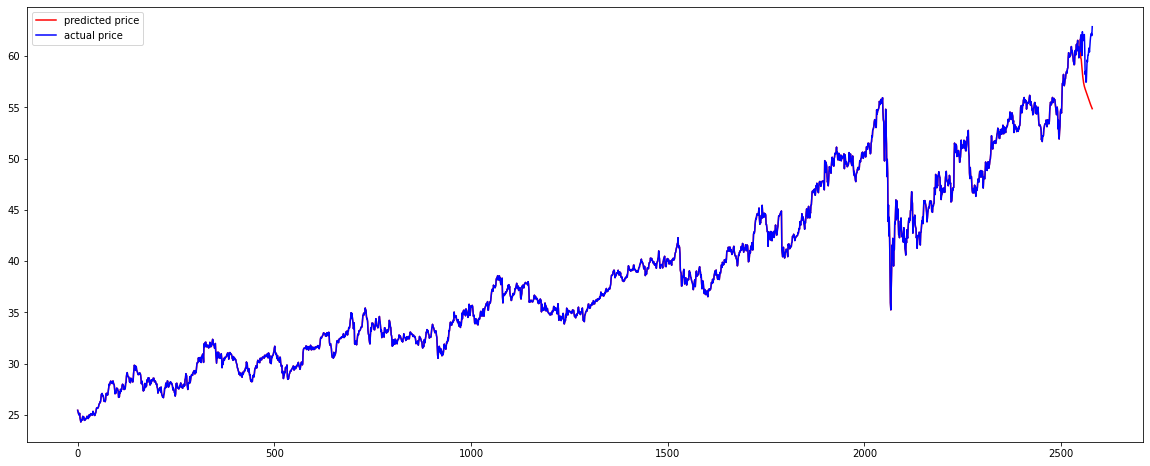

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
df3 = scaler.inverse_transform(df3)
df3.shape, data['adjClose'].shape
plt.figure(figsize=(20,8))
plt.plot(df3[:],color='red', label='predicted price')
plt.plot(data['adjClose'][:], color='blue', label='actual price')
plt.legend()
plt.savefig('KO_prediction_image.png')
plt.show()

2580

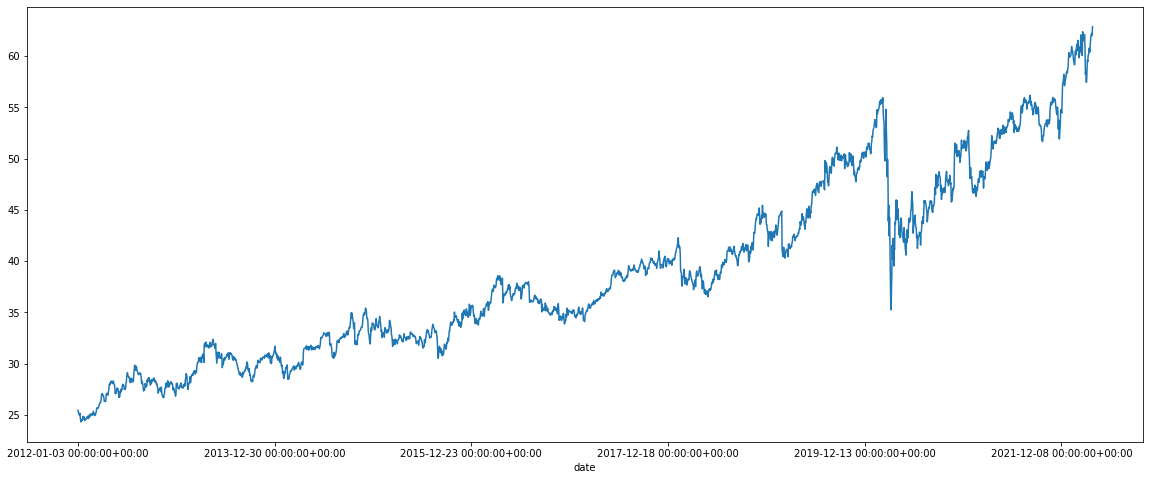

In [ ]:
data.set_index('date')['adjClose'][:].plot(figsize=(20,8))
len(data['adjClose'])

In [ ]:
model.save('KO_prediction')

Model Deployment - FastAPI

In [ ]:
!pip install ColabCode
!pip install FastAPI

In [ ]:
from colabcode import ColabCode
from fastapi import FastAPI
import json

In [ ]:
cc = ColabCode(port=12000, code=False)

In [ ]:
def prepare_data_json(predicted_data, true_data, data_dates):
  predicted_data = predicted_data.tolist()
  json_pred_data = json.dumps(predicted_data)

  dates = data_dates.tolist()
  for i in range(len(dates)):
    dates[i] = dates[i][:10]
  json_dates = json.dumps(dates)
  
  actual_data = true_data['adjClose'].to_numpy().tolist()
  json_act_data = json.dumps(actual_data)

In [ ]:
from google.colab import files
from fastapi.responses import FileResponse
import os

In [ ]:
image_path = '/content/KO_prediction_image.png'

In [ ]:
app = FastAPI()

@app.get("/")
async def read_root():
  return {"predicted_data": json_pred_data,
          "dates": json_dates,
          "actual_data": json_act_data}
@app.get("/image")
async def get_image():
  if os.path.exists(image_path):
    return FileResponse(image_path, media_type='image/png',filename="{}_stock_price.png".format(stock_symbol))
  return {"error" : "file not found!"}

In [ ]:
cc.run_app(app=app)

Public URL: NgrokTunnel: "https://0d49-35-227-187-78.ngrok.io" -> "http://localhost:12000"


INFO:     Started server process [5542]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


INFO:     83.143.251.80:0 - "GET / HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/protocols/http/h11_impl.py", line 394, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/middleware/proxy_headers.py", line 45, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/fastapi/applications.py", line 261, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 181, in __call__
    raise exc
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 159, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.7/dist-packages/sta

INFO:     83.143.251.80:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     83.143.251.80:0 - "GET /imagae HTTP/1.1" 404 Not Found
INFO:     95.158.130.203:0 - "GET /imagae HTTP/1.1" 404 Not Found
INFO:     83.143.251.80:0 - "GET /imagae HTTP/1.1" 404 Not Found
INFO:     83.143.251.80:0 - "GET /image HTTP/1.1" 200 OK
INFO:     37.157.165.196:0 - "GET /image HTTP/1.1" 200 OK
INFO:     91.193.157.229:0 - "GET /image?fbclid=IwAR3laU3yJ-CxxAxaASvwB2JgRmbIg0o91QUgU3ApdGtVd3abGuLgGeVM5Jo HTTP/1.1" 200 OK
INFO:     83.143.252.36:0 - "GET /image?fbclid=IwAR3laU3yJ-CxxAxaASvwB2JgRmbIg0o91QUgU3ApdGtVd3abGuLgGeVM5Jo HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [5542]
